In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
df = pd.read_excel('Ecommerce data.xlsx')

df.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,I wanted to find something that the students c...
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,"I have data from American Science and Surplus,..."
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,NaN


In [13]:
#drop redudentant columns
df = df.iloc[:, :-3]
df.drop(['logtarg', 'tof'], axis=1, inplace=True)

KeyError: "['logtarg', 'tof'] not found in axis"

In [9]:
# view how many different types of variables are there
len(df['id'].unique())

33713

In [12]:
df.describe()

,id,r,f,m,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27
count,3.371300e+04,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,508.427254,5.820603,251.924325,0.590900,0.228102,0.356480,0.104767,0.290659,0.980957,...,10.756127,29.261677,3.694856,39.064488,24.951676,2.015893,0.315122,4.861522,1.328445,2.103172
std,4.426015e+06,542.440039,7.008049,3929.929826,1.762201,0.865510,1.105653,0.527764,1.088606,3.112212,...,38.383837,1377.712988,90.674547,95.897338,71.814323,8.020535,2.206537,19.315840,5.783000,10.894953
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,117.000000,1.000000,39.899994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.967691e+06,293.000000,3.000000,102.629944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.640831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.199823e+07,712.000000,7.000000,247.297485,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,5.087353,19.237610,0.000000,39.849976,20.400543,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.625264e+07,2460.000000,118.000000,532892.000000,109.000000,29.000000,49.000000,22.000000,35.000000,134.000000,...,2632.572266,252683.375000,9440.882812,4158.085938,2489.914062,242.269653,55.907959,585.910156,173.527100,570.722168


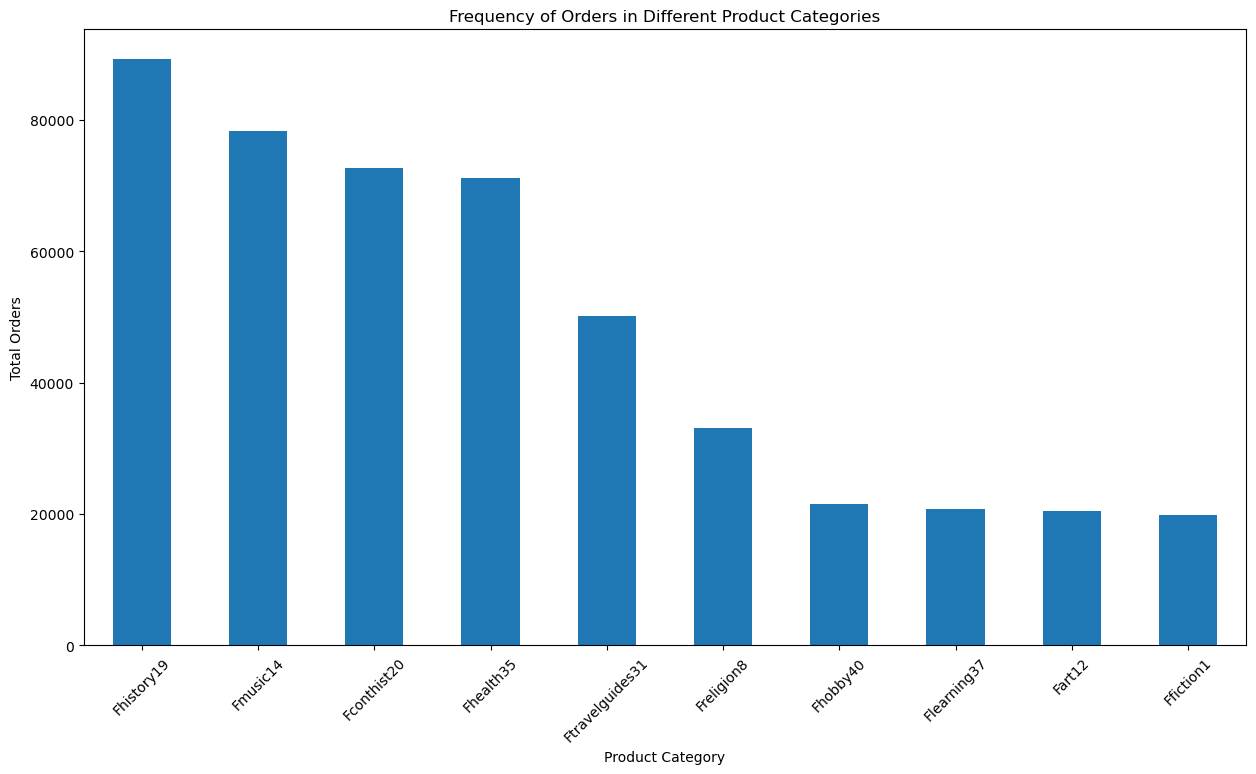

In [32]:
# Selecting columns that start with 'F', which represent the frequency of orders in different product categories
frequency_data = df.filter(regex='^F')

# Summarizing the frequency data to understand overall purchasing behavior
frequency_summary = frequency_data.sum().sort_values(ascending=False)

frequency_summary=frequency_summary.head(10)
# Visualizing the frequency of orders in different product categories
plt.figure(figsize=(15, 8))
frequency_summary.plot(kind='bar')
plt.title('Frequency of Orders in Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()



can observe which product categories are most popular among customers,
valuable for understanding customer preferences, planning inventory, and tailoring marketing strategies to focus on the most in-demand products. ​

In [18]:
monetary_data = df.filter(regex='^M')

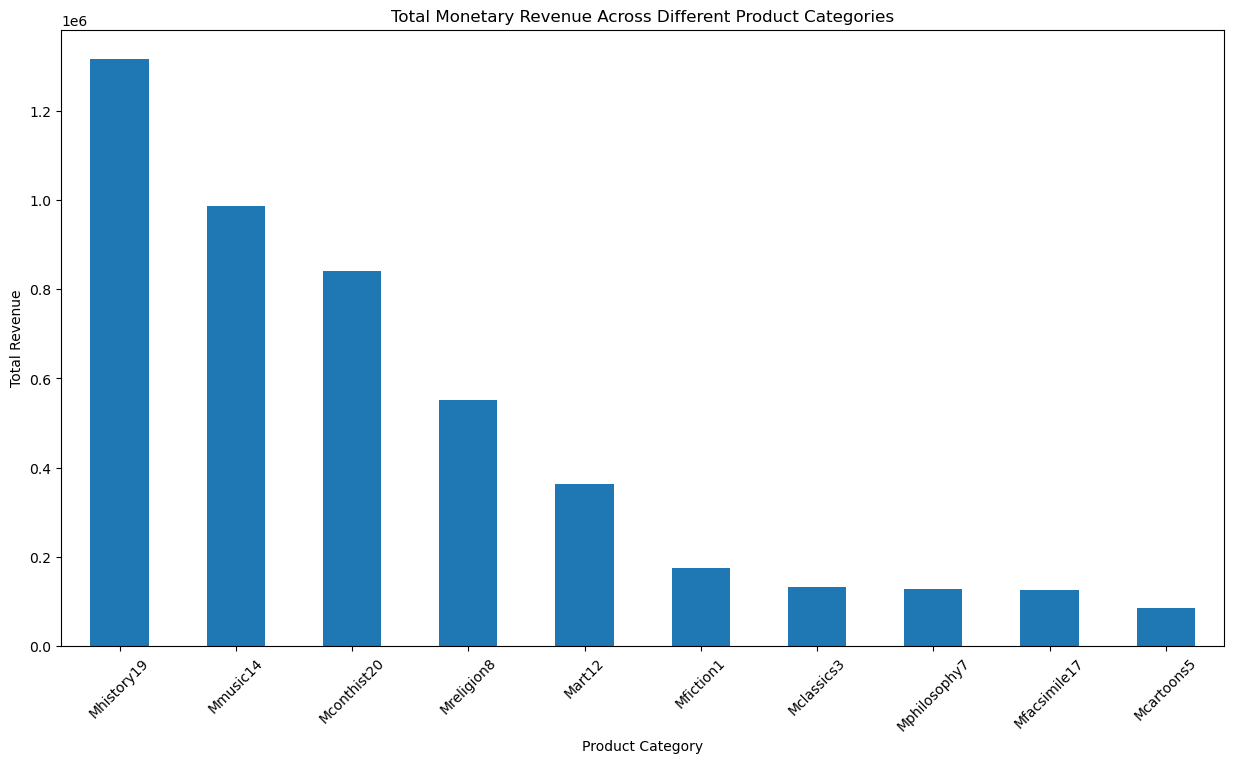

In [24]:
# Calculating the total monetary revenue for each product category
monetary_revenue_per_category = monetary_data.sum().sort_values(ascending=False)


monetary_revenue_per_category=monetary_revenue_per_category.head(10)

# Visualizing the total monetary revenue across different product categories
plt.figure(figsize=(15, 8))
monetary_revenue_per_category.plot(kind='bar')
plt.title('Total Monetary Revenue Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


helps in quickly identifying the most profitable product categories, which can be vital for strategic decision-making in areas such as inventory stocking, marketing campaign

**Modeling: Kmeans**

the methodological steps we will be taking to build our model:

1. Training & experimenting K-means with 6 clusters (testing version)
2. Run the K-means on a rang of 2 -10 clusters (to find optimal number of cluster)
3. Creat Scree plot to visualize the inertia using Elbow method (for visualization)
4. Re-running K-means with n cluster

- frequency_data

In [48]:
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

# RUNNING K-MEANS
X_train = frequency_data.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [5 0 5 ... 0 0 0]
The Inertia is : 3760758.8797962936


In [49]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  5462529.742174685
The inertia for : 3 Cluster is :  4916112.565174465
The inertia for : 4 Cluster is :  4421138.799948887
The inertia for : 5 Cluster is :  4052762.262106477
The inertia for : 6 Cluster is :  3760758.8797962936
The inertia for : 7 Cluster is :  3517672.1855627354
The inertia for : 8 Cluster is :  3329458.7190260184
The inertia for : 9 Cluster is :  3155326.330538611


Text(0.5, 1.0, 'Inertia Plot per k')

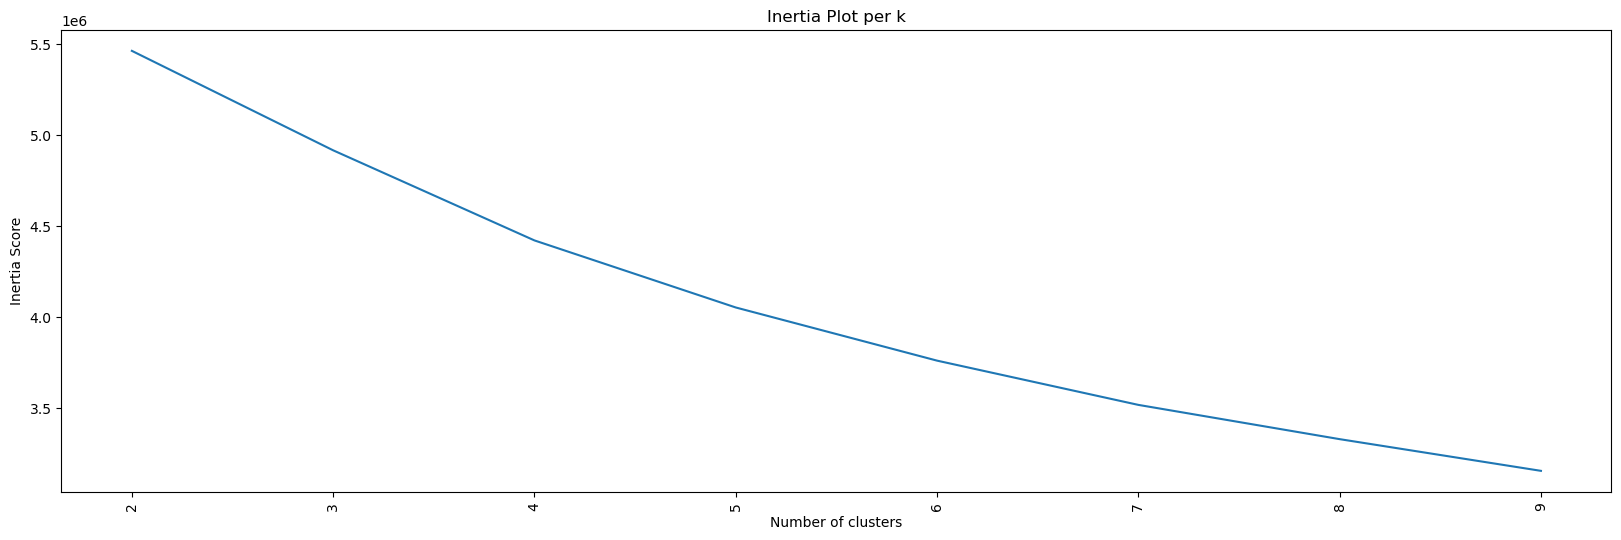

In [35]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

 it seems that the curve is smooth and the decrease in inertia is relatively linear. There is no obvious 'elbow', which is the typical indicator for the optimal number of clusters. This can happen when the data doesn't have a strong clustering structure, or if the clusters are not well-separated.

In [50]:
# RE-RUNNNG K-MEANS ON 4 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,28691,3702,720,344,256


- Monetary data

In [52]:
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

# RUNNING K-MEANS
X_train = monetary_data.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 0 4 ... 0 0 0]
The Inertia is : 573344737.806109


In [53]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  22446642021.269936
The inertia for : 3 Cluster is :  1089285040.2886868
The inertia for : 4 Cluster is :  870720887.3373029
The inertia for : 5 Cluster is :  658821111.6292495
The inertia for : 6 Cluster is :  573344737.806109
The inertia for : 7 Cluster is :  513411702.5026037
The inertia for : 8 Cluster is :  466888491.9175883
The inertia for : 9 Cluster is :  429781949.3686788


Text(0.5, 1.0, 'Inertia Plot per k')

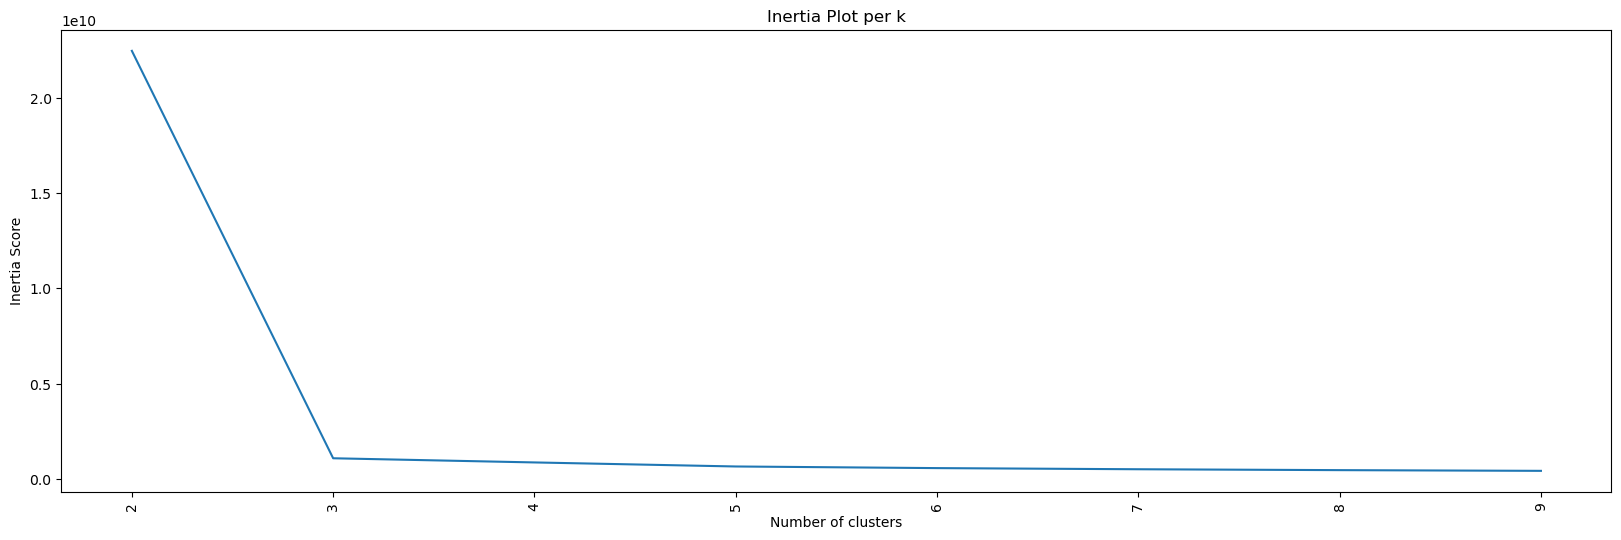

In [38]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

Note:

From the above plot we can come to an understanding that the inertia score start to drop drastically between 3-4 number of cluster.  Thefore, I have decided to choose 4 number of cluster to grain granularity on our study

In [54]:
# RE-RUNNNG K-MEANS ON 4 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,32069,1,1,3,1639


In [55]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [56]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Modeling: Principle Component Analysis**

PCA can help to reveal patterns in the data that are not immediately apparent when looking at the raw data.
Following are the methodological steps we will be taking to plot PCA in 2D:

1. Running Principal Component Analysis (PCA) to visualize & improve results for 5 clusters
2. Identifying the "best" number of components
3. Running PCA again with 9 components
4. Finally re-running K-means with 5 clusters & PCA with 9 components

- Monertary data

Explained variance ratio (first two components): [0.37939271 0.18650074]


<Figure size 640x480 with 0 Axes>

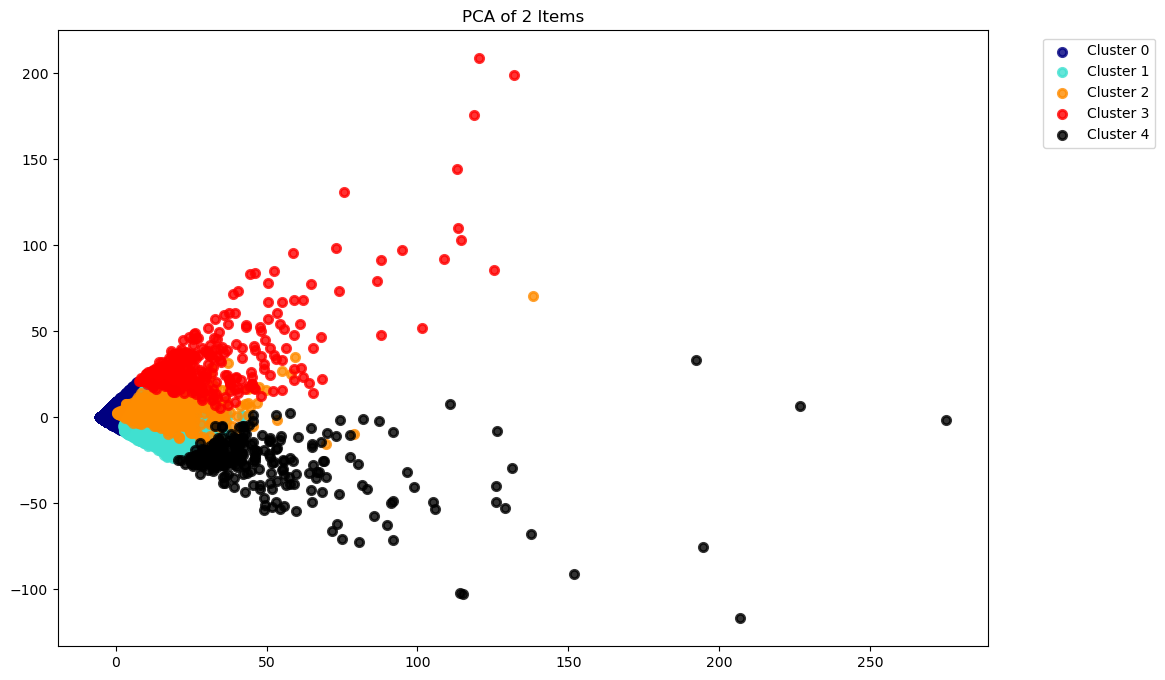

In [51]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  2559404.3063059915
The 95% variance we want to have is:  2431434.090990692

Variance explain with 4 n_compononets:  2552967.087096405
Variance explain with 8 n_compononets:  2558853.3447227934
Variance explain with 9 n_compononets:  2559103.188769359
Variance explain with 10 n_compononets:  2559182.9040122204
Variance explain with 15 n_compononets:  2559404.3063059915
Variance explain with 18 n_compononets:  2559404.3063059915
Variance explain with 21 n_compononets:  2559404.3063059915


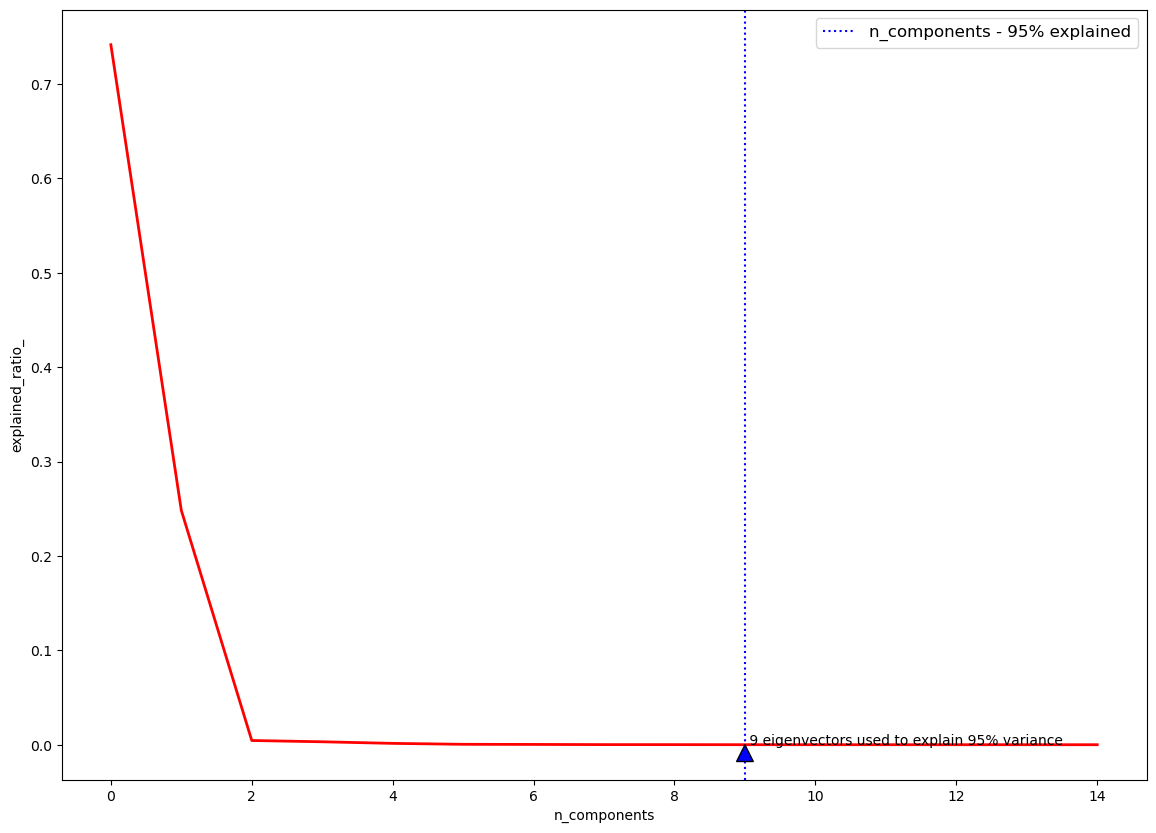

In [58]:
# IDENTIFYING THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# PLOTTING LINE WITH 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]), 
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()